# AMAZON ALEXA REVIEW RATINGS CLASSIFICATION

#  STEP #1: PROBLEM STATEMENT

- Dataset consists of 3000 Amazon customer reviews, star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots.
- The objective is to discover insights into consumer reviews and perfrom sentiment analysis on the data.

# STEP #2: IMPORTING DATA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("amazon_alexa.tsv", sep = '\t')

In [3]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')

In [4]:
data

,rating,date,variation,verified_reviews,feedback
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1
1,5,2018-07-31,Charcoal Fabric,Loved it!,1
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,2018-07-31,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,2018-07-30,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,2018-07-30,Black Dot,"Listening to music, searching locations, check...",1
3147,5,2018-07-30,Black Dot,"I do love these things, i have them running my...",1
3148,5,2018-07-30,White Dot,Only complaint I have is that the sound qualit...,1


In [5]:
data.shape

(3150, 5)

In [6]:
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [7]:
data.isna().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
rating              3150 non-null int64
date                3150 non-null datetime64[ns]
variation           3150 non-null object
verified_reviews    3150 non-null object
feedback            3150 non-null int64
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 123.2+ KB


# STEP #3: VISUALIZING DATA

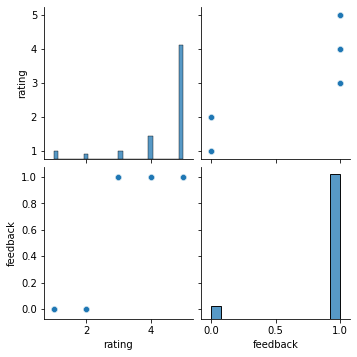

In [9]:
sns.pairplot(data)

C:\Users\bhara_5sejtsc\ML\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


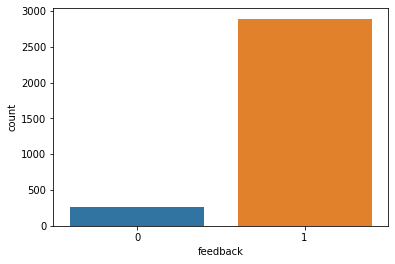

In [10]:
sns.countplot(data['feedback'], label = 'count')

C:\Users\bhara_5sejtsc\ML\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


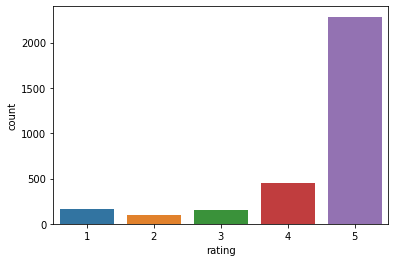

In [11]:
sns.countplot(data['rating'], label = 'count')

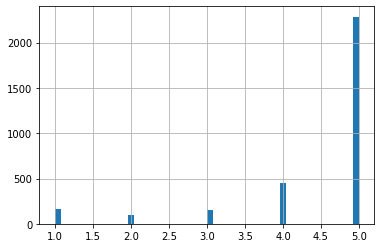

In [12]:
data['rating'].hist(bins=50)

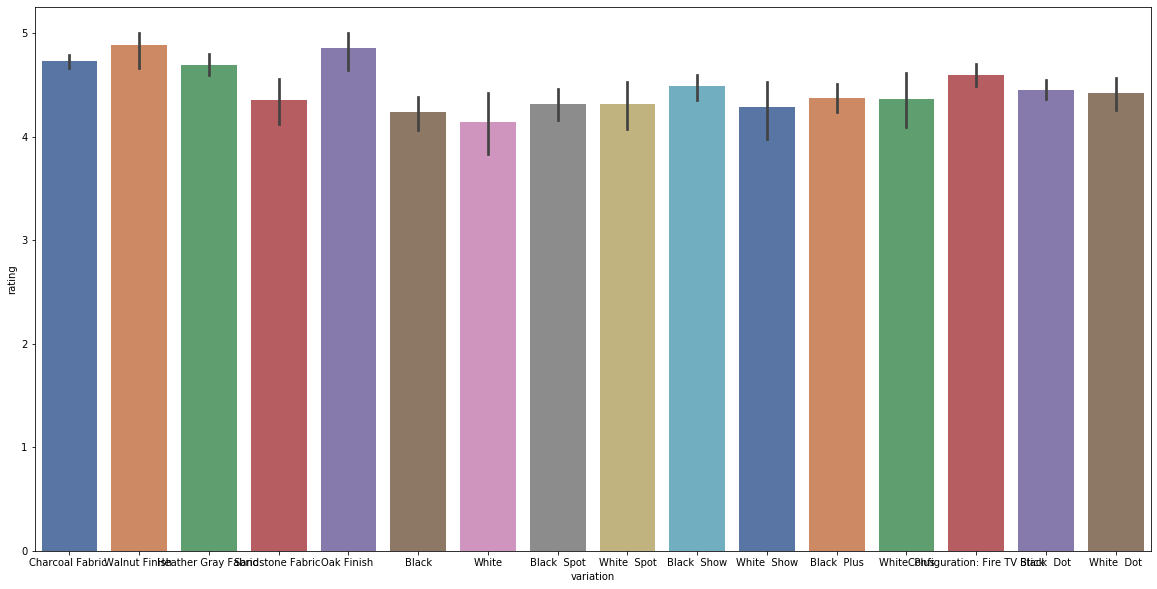

In [13]:
plt.figure(figsize=(20,10))
sns.barplot(x='variation', y = 'rating', data=data, palette = 'deep')

# STEP #4: DATA CLEANING

In [14]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1
1,5,2018-07-31,Charcoal Fabric,Loved it!,1
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,2018-07-31,Charcoal Fabric,Music,1


In [15]:
data['date'].value_counts()

2018-07-30    1603
2018-07-29     482
2018-07-28     250
2018-07-26      85
2018-07-31      81
              ... 
2018-06-01       2
2018-06-04       1
2018-06-13       1
2018-05-29       1
2018-06-09       1
Name: date, Length: 77, dtype: int64

In [16]:
import datetime

In [17]:
data['year'] = data['date'].dt.year

In [18]:
data

,rating,date,variation,verified_reviews,feedback,year
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,2018
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,2018
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1,2018
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,2018
4,5,2018-07-31,Charcoal Fabric,Music,1,2018
...,...,...,...,...,...,...
3145,5,2018-07-30,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,2018
3146,5,2018-07-30,Black Dot,"Listening to music, searching locations, check...",1,2018
3147,5,2018-07-30,Black Dot,"I do love these things, i have them running my...",1,2018
3148,5,2018-07-30,White Dot,Only complaint I have is that the sound qualit...,1,2018


In [19]:
data['month'] = data['date'].dt.month

In [20]:
data['day'] = data['date'].dt.day

In [21]:
data.head()

,rating,date,variation,verified_reviews,feedback,year,month,day
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,2018,7,31
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,2018,7,31
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1,2018,7,31
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,2018,7,31
4,5,2018-07-31,Charcoal Fabric,Music,1,2018,7,31


In [22]:
data.drop('date',inplace=True,axis=1)

In [23]:
data.head()

,rating,variation,verified_reviews,feedback,year,month,day
0,5,Charcoal Fabric,Love my Echo!,1,2018,7,31
1,5,Charcoal Fabric,Loved it!,1,2018,7,31
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1,2018,7,31
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,2018,7,31
4,5,Charcoal Fabric,Music,1,2018,7,31


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 7 columns):
rating              3150 non-null int64
variation           3150 non-null object
verified_reviews    3150 non-null object
feedback            3150 non-null int64
year                3150 non-null int64
month               3150 non-null int64
day                 3150 non-null int64
dtypes: int64(5), object(2)
memory usage: 172.4+ KB


In [25]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
df = pd.DataFrame(ohe.fit_transform(data[["variation"]]).toarray())
labeled_data=pd.concat([data,df],axis=1)
labeled_data

,rating,variation,verified_reviews,feedback,year,month,day,0,1,2,...,6,7,8,9,10,11,12,13,14,15
0,5,Charcoal Fabric,Love my Echo!,1,2018,7,31,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,Charcoal Fabric,Loved it!,1,2018,7,31,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1,2018,7,31,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,2018,7,31,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Charcoal Fabric,Music,1,2018,7,31,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,5,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,2018,7,30,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3146,5,Black Dot,"Listening to music, searching locations, check...",1,2018,7,30,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3147,5,Black Dot,"I do love these things, i have them running my...",1,2018,7,30,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3148,5,White Dot,Only complaint I have is that the sound qualit...,1,2018,7,30,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [26]:
data['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

In [27]:
labeled_data.drop('variation',inplace = True, axis=1)

In [28]:
labeled_data.head()

,rating,verified_reviews,feedback,year,month,day,0,1,2,3,...,6,7,8,9,10,11,12,13,14,15
0,5,Love my Echo!,1,2018,7,31,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,Loved it!,1,2018,7,31,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,"Sometimes while playing a game, you can answer...",1,2018,7,31,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,5,I have had a lot of fun with this thing. My 4 ...,1,2018,7,31,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Music,1,2018,7,31,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
labeled_data.columns

Index([          'rating', 'verified_reviews',         'feedback',
                   'year',            'month',              'day',
                        0,                  1,                  2,
                        3,                  4,                  5,
                        6,                  7,                  8,
                        9,                 10,                 11,
                       12,                 13,                 14,
                       15],
      dtype='object')

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
alexa_countvectorizer = cv.fit_transform(data['verified_reviews'])

In [31]:
alexa_countvectorizer.shape

(3150, 4044)

In [32]:
type(alexa_countvectorizer)

scipy.sparse.csr.csr_matrix

In [33]:
print(alexa_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [34]:
labeled_data.drop('verified_reviews',axis=1,inplace=True)

In [35]:
reviews = pd.DataFrame(alexa_countvectorizer.toarray())

In [36]:
labeled_data = pd.concat([labeled_data,reviews],axis=1)

In [37]:
labeled_data.shape

(3150, 4065)

In [38]:
labeled_data.head()

,rating,feedback,year,month,day,0,1,2,3,4,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,5,1,2018,7,31,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,5,1,2018,7,31,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,4,1,2018,7,31,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,5,1,2018,7,31,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
4,5,1,2018,7,31,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
labeled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Columns: 4065 entries, rating to 4043
dtypes: float64(16), int64(4049)
memory usage: 97.7 MB


In [40]:
len(labeled_data.columns)

4065

In [41]:
labeled_data.shape

(3150, 4065)

In [42]:
X = labeled_data.drop(['feedback'], axis=1)

In [43]:
y = labeled_data['feedback']

# STEP #5 TRAINING DATA

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.5)

In [45]:
X_train.shape

(1575, 4064)

In [46]:
X_test.shape

(1575, 4064)

In [47]:
y_train.shape

(1575,)

In [48]:
y_test.shape

(1575,)

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, criterion = 'entropy', n_estimators = 100)

In [50]:
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

# EVALUATING THE MODEL

In [51]:
y_pred = rfc.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test,y_pred)

In [53]:
print(cm)

[[  59   74]
 [   0 1442]]


In [54]:
accuracy_score(y_test,y_pred)

0.953015873015873

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.44      0.61       133
           1       0.95      1.00      0.97      1442

    accuracy                           0.95      1575
   macro avg       0.98      0.72      0.79      1575
weighted avg       0.96      0.95      0.94      1575

